In [8]:
import io, os, sys, types
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import linear_model

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [9]:
import nbformat

from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell

In [10]:
def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path
    
    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

In [11]:
class NotebookLoader(object):
    """Module Loader for IPython Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path
    
    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)
        
        print ("importing notebook from %s" % path)
                                       
        # load the notebook object
        nb = nbformat.read(path, as_version=4)
        
        
        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod
        
        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__
        
        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

In [13]:
class NotebookFinder(object):
    """Module finder that locates IPython Notebooks"""
    def __init__(self):
        self.loaders = {}
    
    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return
        
        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)
        
        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

In [14]:
sys.meta_path.append(NotebookFinder())

importing notebook from EDA.ipynb
['Station' 'Date' 'Tmax' 'Tmin' 'Tavg' 'Depart' 'DewPoint' 'WetBulb' 'Heat'
 'Cool' 'Sunrise' 'Sunset' 'CodeSum' 'Depth' 'Water1' 'SnowFall'
 'PrecipTotal' 'StnPressure' 'SeaLevel' 'ResultSpeed' 'ResultDir'
 'AvgSpeed']
Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64
Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall      

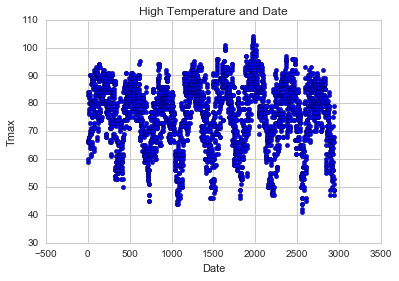

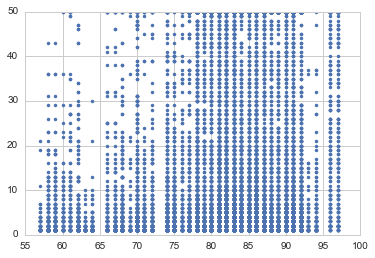

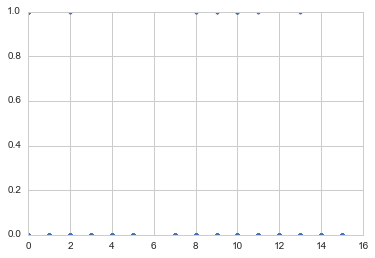

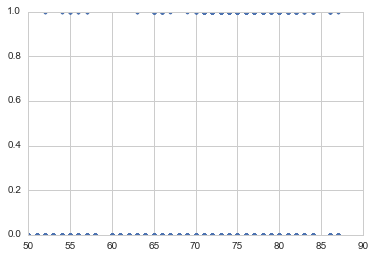

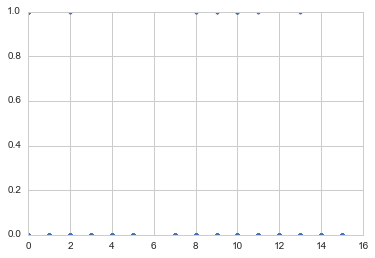

Numerical columns:
set(['AddressNumberAndStreet_7900  S CHICAGO AVE, Chicago, IL', 'Street_ E 111TH ST', 'Street_ S CALIFORNIA', 'Trap_T081', 'Address_5800 North Pulaski Road, Chicago, IL 60646, USA', 'Trap_T083', 'Station', 'Trap_T085', 'Trap_T084', 'Trap_T086', 'AddressNumberAndStreet_1100  S STATE ST, Chicago, IL', 'Trap_T088', 'Address_6500 North Oak Park Avenue, Chicago, IL 60631, USA', 'Address_1100 Roosevelt Road, Chicago, IL 60608, USA', 'Tmin', 'Trap_T160', 'Trap_T161', 'Street_ W GRANVILLE AVE', 'StnPressure', 'AddressNumberAndStreet_1500  N LONG AVE, Chicago, IL', 'Street_ S AVENUE G', 'Street_ S CORNELL AVE', 'Address_3900 North Springfield Avenue, Chicago, IL 60618, USA', 'Street_ S AVENUE L', 'Street_ W GREENLEAF AVE', 'AddressNumberAndStreet_2100  S HAMLIN AVE, Chicago, IL', 'AddressNumberAndStreet_2500  S THROOP, Chicago, IL', 'Street_ W MONTROSE DR', 'Trap_T018', 'Trap_T019', 'Street_ S STONY ISLAND AVE', 'Trap_T012', 'Trap_T013', 'AddressNumberAndStreet_1300  S TORREN

In [15]:
import EDA

In [16]:
EDA.joined_data

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
5,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
6,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
7,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
8,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
9,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [17]:
joined_data = EDA.joined_data

In [18]:
# Convert to datetime object
joined_data['Date'] = pd.to_datetime(joined_data['Date'])

# Use `Date` as index
joined_data.set_index('Date', inplace=True)

# Add extra columns to break out month and year
joined_data['Year'] = joined_data.index.year
joined_data['Month'] = joined_data.index.month

In [19]:
joined_data.head()

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,M,0.0,0.00,29.39,30.11,5.8,18,6.5,2007,5
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,M,M,0.00,29.44,30.09,5.8,16,7.4,2007,5
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,M,0.0,0.00,29.39,30.11,5.8,18,6.5,2007,5
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,...,M,M,0.00,29.44,30.09,5.8,16,7.4,2007,5
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,...,M,0.0,0.00,29.39,30.11,5.8,18,6.5,2007,5


In [21]:
joined_data_numeric = joined_data.apply(pd.to_numeric, errors='coerce')

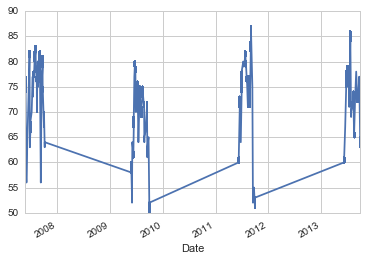

In [22]:
# Plot temperature over time
joined_data_numeric['Tavg'].plot()

In [24]:
data_2007 = joined_data_numeric['2007']

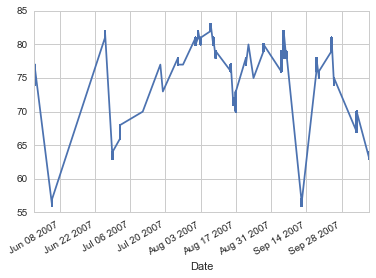

In [25]:
data_2007['Tavg'].plot()

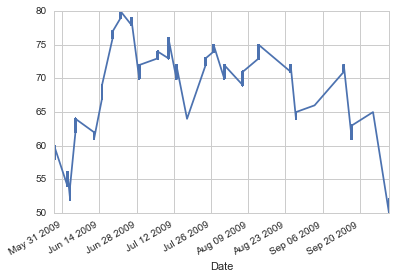

In [26]:
data_2009 = joined_data_numeric['2009']
data_2009['Tavg'].plot()

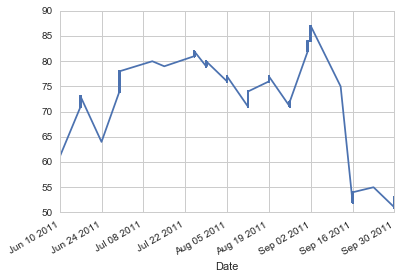

In [27]:
data_2011 = joined_data_numeric['2011']
data_2011['Tavg'].plot()

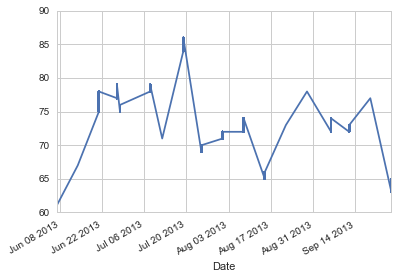

In [29]:
data_2013 = joined_data_numeric['2013']
data_2013['Tavg'].plot()